In [1]:
import pandas as pd 
datos=pd.read_excel("base.xlsx")
datos

,EDAD,DISCAPACIDAD\n,EDUCACION,TIPO_DISCAPACIDAD
0,14,0.45,BASICA,INTELECTUAL
1,14,0.66,BASICA,INTELECTUAL
2,14,0.32,BASICA,AUDITIVA
3,13,0.50,BASICA,INTELECTUAL
4,16,0.70,BASICA,INTELECTUAL
...,...,...,...,...
71,20,0.54,BACHILLERATO,INTELECTUAL
72,20,0.45,BACHILLERATO,INTELECTUAL
73,18,0.40,BACHILLERATO,INTELECTUAL
74,17,0.55,BACHILLERATO,INTELECTUAL


In [3]:
datos.dtypes

EDAD                    int64
DISCAPACIDAD\n        float64
EDUCACION              object
TIPO_DISCAPACIDAD      object
dtype: object

In [5]:
datos.isnull().sum()

EDAD                  0
DISCAPACIDAD\n        0
EDUCACION             0
TIPO_DISCAPACIDAD     0
dtype: int64

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EDAD                76 non-null     int64  
 1   DISCAPACIDAD
       76 non-null     float64
 2   EDUCACION           76 non-null     object 
 3   TIPO_DISCAPACIDAD   76 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.5+ KB


In [9]:
nume= datos['DISCAPACIDAD\n'].astype('float')
nume

0     0.45
1     0.66
2     0.32
3     0.50
4     0.70
      ... 
71    0.54
72    0.45
73    0.40
74    0.55
75    0.55
Name: DISCAPACIDAD\n, Length: 76, dtype: float64

In [11]:
correlacion = datos[['EDAD ', 'DISCAPACIDAD\n']].corr()
print("Correlación entre Edad y Discapacidad:")
print(correlacion)


Correlación entre Edad y Discapacidad:
                   EDAD   DISCAPACIDAD\n
EDAD            1.000000       -0.052318
DISCAPACIDAD\n -0.052318        1.000000


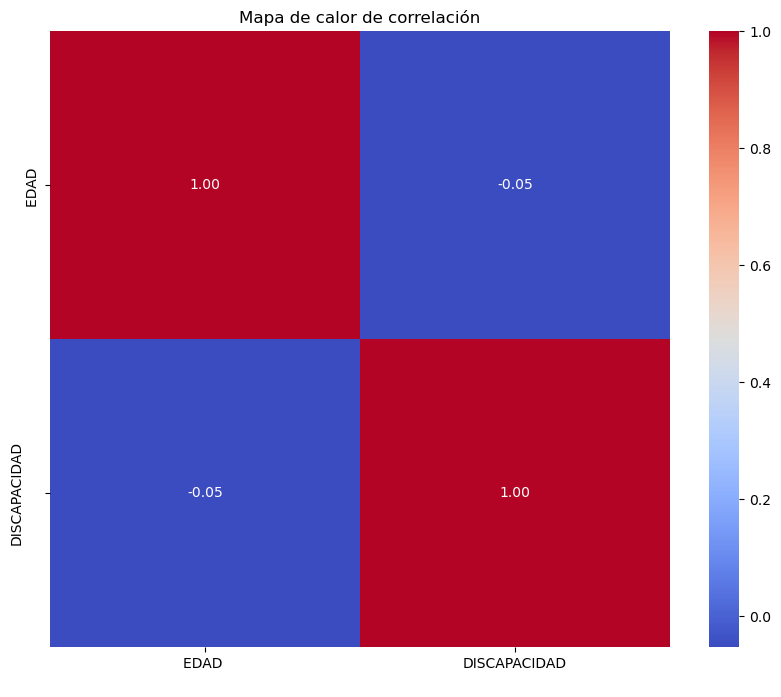

In [13]:
correlation_matrix = datos[['EDAD ', 'DISCAPACIDAD\n']].corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", annot=True)
plt.title('Mapa de calor de correlación')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

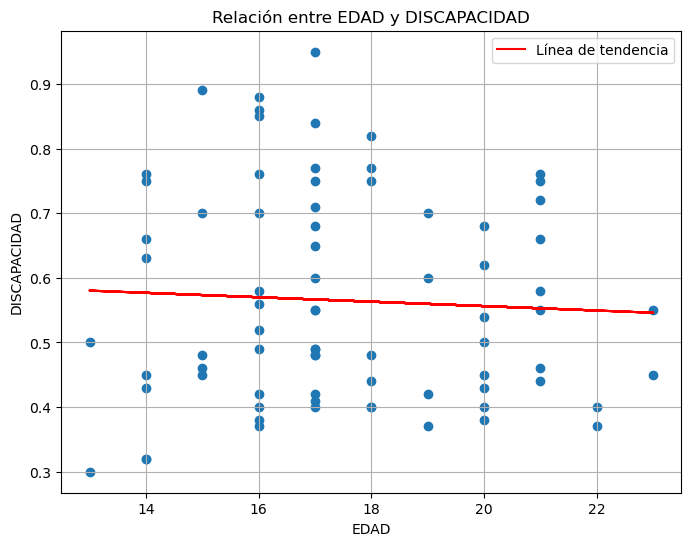

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(datos["EDAD "], datos["DISCAPACIDAD\n"])
plt.title('Relación entre EDAD y DISCAPACIDAD')
plt.xlabel('EDAD')
plt.ylabel('DISCAPACIDAD')
plt.grid(True)
slope, intercept = np.polyfit(datos["EDAD "], datos["DISCAPACIDAD\n"], 1)
plt.plot(datos["EDAD "], slope * datos["EDAD "] + intercept, color='red', label='Línea de tendencia')
plt.legend()
plt.savefig('correlation_puntos.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
df = pd.DataFrame(datos)
df

,EDAD,DISCAPACIDAD\n,EDUCACION,TIPO_DISCAPACIDAD
0,14,0.45,BASICA,INTELECTUAL
1,14,0.66,BASICA,INTELECTUAL
2,14,0.32,BASICA,AUDITIVA
3,13,0.50,BASICA,INTELECTUAL
4,16,0.70,BASICA,INTELECTUAL
...,...,...,...,...
71,20,0.54,BACHILLERATO,INTELECTUAL
72,20,0.45,BACHILLERATO,INTELECTUAL
73,18,0.40,BACHILLERATO,INTELECTUAL
74,17,0.55,BACHILLERATO,INTELECTUAL


In [21]:
datos["TIPO_DISCAPACIDAD "]

0     INTELECTUAL
1     INTELECTUAL
2       AUDITIVA 
3     INTELECTUAL
4     INTELECTUAL
         ...     
71    INTELECTUAL
72    INTELECTUAL
73    INTELECTUAL
74    INTELECTUAL
75    INTELECTUAL
Name: TIPO_DISCAPACIDAD , Length: 76, dtype: object

In [23]:
conteo = datos.groupby(['EDUCACION', 'TIPO_DISCAPACIDAD ']).size().reset_index(name='counts')
conteo

,EDUCACION,TIPO_DISCAPACIDAD,counts
0,BACHILLERATO,AUDITIVA,4
1,BACHILLERATO,FISICA,4
2,BACHILLERATO,INTELECTUAL,20
3,BASICA,AUDITIVA,7
4,BASICA,FISICA,9
5,BASICA,INTELECTUAL,32


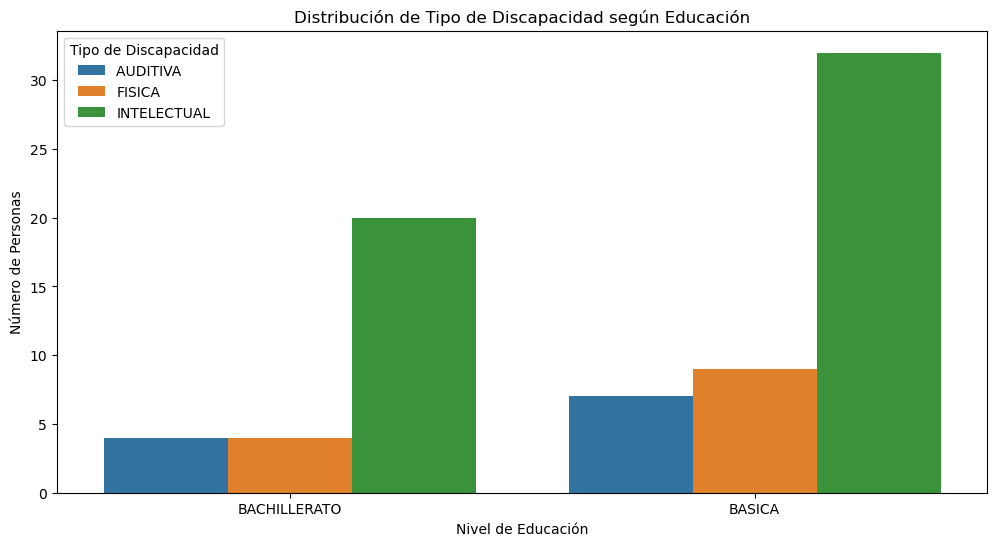

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=conteo, x='EDUCACION', y='counts', hue='TIPO_DISCAPACIDAD ')
plt.title('Distribución de Tipo de Discapacidad según Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Número de Personas')
plt.legend(title='Tipo de Discapacidad')
plt.savefig('dsitibucion.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
tabla_contingencia = pd.crosstab(datos['EDUCACION'], datos['TIPO_DISCAPACIDAD '])
print(tabla_contingencia)


TIPO_DISCAPACIDAD   AUDITIVA   FISICA  INTELECTUAL
EDUCACION                                         
BACHILLERATO                4       4           20
BASICA                      7       9           32


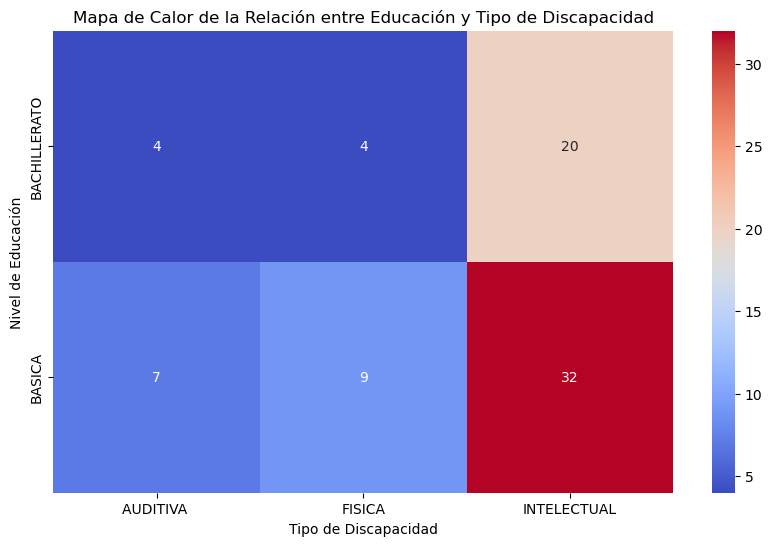

In [41]:

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap="coolwarm")
plt.title('Mapa de Calor de la Relación entre Educación y Tipo de Discapacidad')
plt.xlabel('Tipo de Discapacidad')
plt.ylabel('Nivel de Educación')
plt.savefig('mapa.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(tabla_contingencia)

print(f"Chi-Cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Tabla esperada:\n{ex}")

# Interpretar el p-valor
if p < 0.05:
    print("Hay una relación significativa entre EDUCACION y TIPO_DISCAPACIDAD.")
else:
    print("No hay una relación significativa entre EDUCACION y TIPO_DISCAPACIDAD.")

Chi-Cuadrado: 0.26573426573426573
P-valor: 0.8755814203734152
Grados de libertad: 2
Tabla esperada:
[[ 4.05263158  4.78947368 19.15789474]
 [ 6.94736842  8.21052632 32.84210526]]
No hay una relación significativa entre EDUCACION y TIPO_DISCAPACIDAD.


In [49]:
# Calcular proporciones
proporciones = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

# Mostrar las proporciones
print(proporciones)


TIPO_DISCAPACIDAD   AUDITIVA      FISICA  INTELECTUAL
EDUCACION                                            
BACHILLERATO        14.285714  14.285714    71.428571
BASICA              14.583333  18.750000    66.666667


In [45]:
from sklearn.preprocessing import LabelEncoder
# Crear el codificador
le_educacion = LabelEncoder()
le_tipo_disabilidad = LabelEncoder()

# Aplicar el codificador a las columnas
df['EDUCACION'] = le_educacion.fit_transform(df['EDUCACION'])
df['TIPO_DISCAPACIDAD '] = le_tipo_disabilidad.fit_transform(df['TIPO_DISCAPACIDAD '])

# Calcular la correlación
correlation = df[['EDUCACION', 'TIPO_DISCAPACIDAD ']].corr().iloc[0, 1]

print("Correlación entre educación y tipo de discapacidad:", correlation)

Correlación entre educación y tipo de discapacidad: -0.033276577426750754


In [47]:
correlation_matrix = df[['EDUCACION', 'TIPO_DISCAPACIDAD ']].corr()

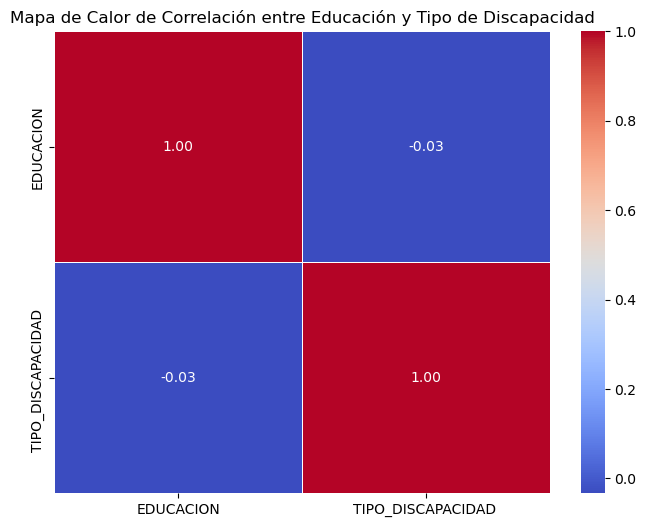

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Educación y Tipo de Discapacidad')
plt.savefig('calor.png', dpi=300, bbox_inches='tight')
plt.show()